In [1]:
import tiling
import matplotlib.pyplot as plt

In [2]:
tile1 = tiling.TileType(
    name="I",
    bottom_edges=[],
    top_edges=[],
    left_edges=[],
    right_edges=[],
    drawing=tiling.TileTypeDrawing(segments=[], vertices=[])
)

In [3]:
tile2 = tiling.TileType(
    name="II",
    bottom_edges=[],
    top_edges=[],
    left_edges=[],
    right_edges=[0.0],
    drawing=tiling.TileTypeDrawing(
        segments=[
            tiling.TileTypeDrawSegment(local_start=(0.0,0.0), local_end=(1.0,0.0)),
        ],
        vertices=[
            tiling.TileTypeDrawVertex(location=(0.0,0.0)),
        ]
    )
)

In [4]:
tile3 = tiling.TileType(
    name="III",
    bottom_edges=[],
    top_edges=[],
    left_edges=[0.0],
    right_edges=[0.0],
    drawing=tiling.TileTypeDrawing(segments=[
        tiling.TileTypeDrawSegment(local_start=(-1.0,0.0), local_end=(1.0, 0.0))
    ], vertices=[]),
)

In [5]:
tile4 = tiling.TileType(
    name="IV",
    bottom_edges=[0.0],
    top_edges = [],
    left_edges = [0.0],
    right_edges = [],
    drawing=tiling.TileTypeDrawing(
        segments=[
            tiling.TileTypeDrawSegment(local_start=(-1.0, 0.0), local_end=(0.0, 0.0)),
            tiling.TileTypeDrawSegment(local_start=(0.0, 0.0), local_end=(0.0, -1.0)),
        ],
        vertices=[]
    )
)

In [6]:
tile5 = tiling.TileType(
    name="V",
    bottom_edges=[0.0],
    top_edges=[],
    left_edges=[0.0],
    right_edges=[0.0],
    drawing=tiling.TileTypeDrawing(
        segments=[
            tiling.TileTypeDrawSegment(local_start=(-1.0, 0.0), local_end=(0.0, 0.0)),
            tiling.TileTypeDrawSegment(local_start=(0.0, 0.0), local_end=(0.0, -1.0)),
            tiling.TileTypeDrawSegment(local_start=(0.0, 0.0), local_end=(1.0, 0.0))
        ],
        vertices=[tiling.TileTypeDrawVertex(location=(0.0,0.0))]
    )
)

In [7]:
tile6 = tiling.TileType(
    name="VI",
    bottom_edges=[0.0],
    top_edges=[0.0],
    left_edges=[0.0],
    right_edges=[0.0],
    drawing=tiling.TileTypeDrawing(
        segments=[
            tiling.TileTypeDrawSegment(local_start=(-1.0, 0.0), local_end=(0.0, 0.0)),
            tiling.TileTypeDrawSegment(local_start=(0.0, 0.0), local_end=(0.0, -1.0)),
            tiling.TileTypeDrawSegment(local_start=(0.0, 0.0), local_end=(1.0, 0.0)),
            tiling.TileTypeDrawSegment(local_start=(0.0, 0.0), local_end=(0.0, 1.0))
        ],
        vertices=[tiling.TileTypeDrawVertex(location=(0.0,0.0))]
    )
)

# Visualize tiles and rotations

In [8]:
def draw_tile(tile, **kw):
    return tiling.draw_solution({(0,0): tile}, **kw)

Ref =  bottom [] right [0.0] top [] left []
Ref = x bottom [] right [] top [] left [0.0]
Ref = y bottom [] right [-0.0] top [] left []
Ref = xy bottom [] right [] top [] left [-0.0]


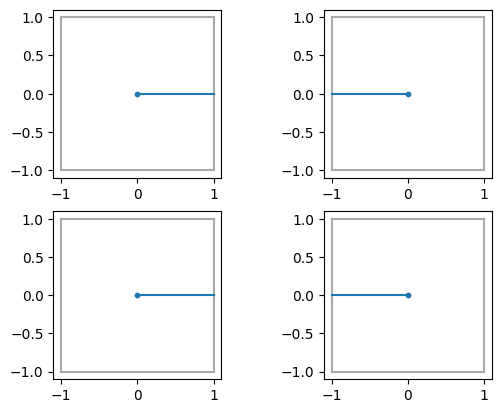

In [9]:
fig, ((a1, a2), (a3, a4)) = plt.subplots(nrows=2, ncols=2)
axes = [a1, a2, a3, a4]
reflections = ['', 'x', 'y', 'xy']
for a in range(4):
    ref = reflections[a]
    if ref == '':
        rot = tile2
    elif ref in ('x', 'y'):
        rot = tile2.reflect(ref)
    else:
        rot = tile2.reflect('x').reflect('y')
    draw_tile(rot, axis=axes[a])
    print("Ref =", ref, "bottom", rot.bottom_edges, "right", rot.right_edges, "top", rot.top_edges, "left", rot.left_edges)

In [10]:
mixed_instance = tiling.TilingInstance(
    instance_name="10x10 mixed",
    height=10,
    width=10,
    tile_types=[tile1, tile2, tile3, tile4, tile5, tile6],
    tile_type_counts=[16, 17, 17, 17, 17, 16]
)

In [11]:
solver = tiling.SimpleCPSATSolver(instance=mixed_instance)

In [12]:
solution = solver.solve()

<Axes: >

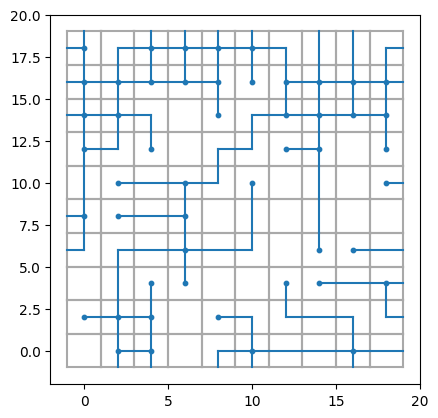

In [13]:
tiling.draw_solution(solution)

# Checking some mix of I and V

In [9]:
def mix_i_and_v(n_v, k=15):
    n = k * k
    if n_v > n:
        raise ValueError("n_v > n")
    n_i = n - n_v
    return tiling.TilingInstance(
        instance_name=f"i_and_v_{k}x{k}_{n_v}",
        height=k,
        width=k,
        tile_types=[tile1, tile5],
        tile_type_counts=[n_i, n_v],
    )

In [17]:
for n_v in range(226):
    instance = mix_i_and_v(n_v)
    solver = tiling.SimpleCPSATSolver(instance)
    sol = solver.solve()
    if sol is None:
        print(f"n_v = {n_v} is impossible")
    else:
        print(f"n_v = {n_v} is possible")
        tiling.draw_solution(sol)
        plt.savefig(f"i_and_v_15x15/sol_for_{n_v}.pdf")
        plt.clf()

n_v = 0 is possible
n_v = 1 is impossible
n_v = 2 is impossible
n_v = 3 is impossible
n_v = 4 is impossible
n_v = 5 is impossible
n_v = 6 is impossible
n_v = 7 is impossible
n_v = 8 is impossible
n_v = 9 is impossible
n_v = 10 is impossible
n_v = 11 is impossible
n_v = 12 is impossible
n_v = 13 is impossible
n_v = 14 is impossible
n_v = 15 is possible
n_v = 16 is impossible
n_v = 17 is impossible
n_v = 18 is impossible
n_v = 19 is impossible
n_v = 20 is impossible
n_v = 21 is impossible
n_v = 22 is impossible
n_v = 23 is impossible
n_v = 24 is impossible
n_v = 25 is impossible
n_v = 26 is impossible
n_v = 27 is impossible
n_v = 28 is impossible
n_v = 29 is possible
n_v = 30 is possible
n_v = 31 is possible
n_v = 32 is possible
n_v = 33 is possible
n_v = 34 is possible
n_v = 35 is possible
n_v = 36 is possible
n_v = 37 is possible
n_v = 38 is possible
n_v = 39 is possible
n_v = 40 is possible
n_v = 41 is possible
n_v = 42 is possible
n_v = 43 is possible
n_v = 44 is possible
n_v = 45 is

<Figure size 640x480 with 0 Axes>

# Pairwise checking function for given decider

In [35]:
def mix_2(types, k, n_1):
    n = k * k
    if n_1 > n:
        raise ValueError("n_1 too large")
    n_2 = n - n_1
    return tiling.TilingInstance(
        instance_name =f"mix_{types[0].name}_{types[1].name}_{k}x{k}_{n_1}",
        height=k,
        width=k,
        tile_types=types,
        tile_type_counts=[n_1, n_2]
    )

def check_2(tiles, check_k, decider):
    check_n = check_k * check_k
    for n_1 in range(check_n + 1):
        instance = mix_2(tiles, check_k, n_1)
        expected = decider(instance, n_1)
        solver = tiling.SimpleCPSATSolver(instance)
        sol = solver.solve()
        if sol is None and expected:
            print(f"Expected n_1 = {n_1} possible but it is not!")
            break
        elif sol is not None and not expected:
            print(f"Expected n_1 = {n_1} impossible but it is possible!")
            tiling.draw_solution(sol)
            return False
    return True

# Checking I and II

In [48]:
def always_true(instance, *args):
    return True
check_2([tile1, tile2], 10, always_true)

True

# Checking I and III
It seems that our decision function here is correct (and fairly trivial).

In [36]:
def decide_i_and_iii(instance, n_i):
    if (n_i % instance.width == 0) or (n_i % instance.height == 0):
        return True
    return False

In [37]:
check_2([tile1, tile3], 10, decide_i_and_iii)

True

# Checking I and IV

In [39]:
def decide_i_and_iv(instance, n_i):
    return True
check_2([tile1, tile4], 10, decide_i_and_iv)

True

# Checking I and V
This decision function needs a proof, and possibly some fine tuning for low $n$.

In [40]:
def decide_i_and_v(instance, n_i):
    if instance.width != instance.height:
        raise ValueError("Non-square rectangles not supported")
    n = instance.width * instance.height
    k = instance.width
    if n_i > n:
        return False
    n_v = n - n_i
    if n_v % k == 0 or n_v > 2 * k - 2:
        return True
    return False

In [41]:
check_2([tile1, tile5], 10, decide_i_and_v)

True

# Checking I and VI

In [42]:
def decide_i_and_vi(instance, n_i):
    n = instance.width * instance.height
    return n_i == 0 or n_i == n
check_2([tile1, tile6], 10, decide_i_and_vi)

True

# Checking II and III, II and IV, II and V

In [44]:
check_2([tile2, tile3], 10, always_true),\
check_2([tile2, tile4], 10, always_true),\
check_2([tile2, tile5], 10, always_true)

(True, True, True)

# Checking III and IV

In [45]:
check_2([tile3, tile4], 10, always_true)

True

# Checking some mix of I, II, III

In [46]:
def mix_3(types, k, n_1, n_2):
    n = k * k
    if n_1 + n_2 > n:
        raise ValueError("n_1 + n_2 too large")
    n_3 = n - n_1 - n_2
    return tiling.TilingInstance(
        instance_name=f"mix_{types[0].name}_{types[1].name}_{types[2].name}_{k}x{k}_{n_1}_{n_2}",
        height=k,
        width=k,
        tile_types=types,
        tile_type_counts=[n_1, n_2, n_3]
    )

def check_3(types, k, decider):
    n = k * k
    for n_1 in range(1, n-1):
        for n_2 in range(1, n - n_1):
            instance = mix_3(types, k, n_1, n_2)
            expected = decider(instance, n_1, n_2)
            solver = tiling.SimpleCPSATSolver(instance)
            sol = solver.solve()
            if sol is None and expected:
                print(f"n_1 = {n_1}, n_2 = {n_2} does not work (but was expected to)")
                return False
            if sol is not None and not expected:
                print(f"n_1 = {n_1}, n_2 = {n_2} does work (but was not expected to)")
                tiling.draw_solution(sol)
                return False
    return True

In [49]:
print("Check I, II, III: ")
print(check_3([tile1, tile2, tile3], 11, always_true))

Check I, II, III: 


RuntimeError: Solver failed with status: 0

In [ ]:
print("Check I, II, IV: ")
print(check_3([tile1, tile2, tile4], 11, always_true))

In [ ]:
print("Check I, II, V: ")
print(check_3([tile1, tile2, tile5], 11, always_true))

# Checking I, II, VI

In [ ]:
k = 11
n = k * k
table = {}
for n_1 in range(1, n-1):
    for n_2 in range(1, n - n_1):
        instance = mix_3([tile1, tile2, tile6], k, n_1, n_2)
        n_6 = n - n_1 - n_2
        solver = tiling.SimpleCPSATSolver(instance)
        sol = solver.solve()
        if sol is not None:
            table[n_1, n_2, n_6] = True
        else:
            table[n_1, n_2, n_6] = False
    print(f"n_1 = {n_1} done")

n_1 = 1 done
n_1 = 2 done
n_1 = 3 done
n_1 = 4 done
n_1 = 5 done
n_1 = 6 done
n_1 = 7 done
n_1 = 8 done
n_1 = 9 done
n_1 = 10 done
n_1 = 11 done
n_1 = 12 done
n_1 = 13 done
n_1 = 14 done
n_1 = 15 done
n_1 = 16 done
n_1 = 17 done
n_1 = 18 done
n_1 = 19 done
n_1 = 20 done
n_1 = 21 done
n_1 = 22 done
n_1 = 23 done
n_1 = 24 done
n_1 = 25 done
n_1 = 26 done
n_1 = 27 done
n_1 = 28 done
n_1 = 29 done
n_1 = 30 done
n_1 = 31 done
n_1 = 32 done
n_1 = 33 done
n_1 = 34 done
n_1 = 35 done
n_1 = 36 done
n_1 = 37 done
n_1 = 38 done
n_1 = 39 done
n_1 = 40 done
n_1 = 41 done
n_1 = 42 done
n_1 = 43 done
n_1 = 44 done
n_1 = 45 done
n_1 = 46 done
n_1 = 47 done
n_1 = 48 done
n_1 = 49 done
